In [1]:
import access2thematrix
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog, Label
import pySPM
import spiepy
from pathlib import Path
import pandas as pd

H:\anaconda3\envs\extract-mtrx\lib\site-packages\pySPM\utils\misc.py:135: UserWarning: the library tqdm cannot be found. All progressbar will be disabled.
  warn("the library tqdm cannot be found. All progressbar will be disabled.")


In [2]:
def line_flatten(image):
    image = np.array(image)
    output = np.zeros(image.shape)
    for i, row in enumerate(image):
        mean = np.mean(row)
        output[i] = row - mean
    
    return output

In [3]:
root = Tk()
Label(root, text="Select data folder")
folder_path = filedialog.askdirectory()
root.destroy()
mtrx_files = glob.glob(os.path.join(folder_path, "**/*.*Z_mtrx"), recursive = True)

In [4]:
sample_batch_name = Path(folder_path).parts[-1]

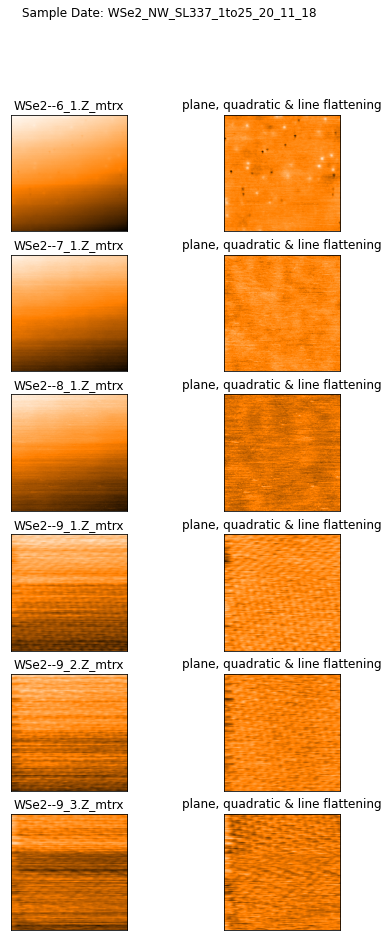

In [12]:
im = spiepy.Im()
mtrx = access2thematrix.MtrxData()
fig, axs = plt.subplots(len(mtrx_files), 2)
fig.suptitle(f'Sample Date: {sample_batch_name}')
fig.set_figheight(15)
fig.set_figwidth(7)
for i, filename in enumerate(mtrx_files):
    traces, message = mtrx.open(filename)
    image, message = mtrx.select_image(traces[0])
    im.data = image.data
    im_output, _ = spiepy.flatten_xy(im)
    image_poly , _ = spiepy.flatten_poly_xy(im_output , deg = 2)
    image_flattened = line_flatten(image_poly.data)

    sample_name = f'{filename[-16:]}'
    axs[i, 0].imshow(im.data , cmap = spiepy.NANOMAP, origin = 'lower')
    axs[i, 0].set_title(sample_name)
    axs[i, 1].imshow(image_flattened , cmap = spiepy.NANOMAP, origin = 'lower')
    axs[i, 1].set_title('plane, quadratic & line flattening')
    
    dst_path = os.path.join(folder_path, filename + ".jpg")
    plt.imsave(dst_path, image_poly.data, cmap='gray', origin = 'lower')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
plt.savefig(f'{sample_batch_name} Post Processing STM Image Comparisions.png', 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')

In [6]:
mtrx_files

['G:/Research/AI_STM/mtrx-storage/hone_group/WSe2_NW_SL337_1to25_20_11_18\\2020-11-18 - Copy\\WSe2--6_1.Z_mtrx',
 'G:/Research/AI_STM/mtrx-storage/hone_group/WSe2_NW_SL337_1to25_20_11_18\\2020-11-18 - Copy\\WSe2--7_1.Z_mtrx',
 'G:/Research/AI_STM/mtrx-storage/hone_group/WSe2_NW_SL337_1to25_20_11_18\\2020-11-18 - Copy\\WSe2--8_1.Z_mtrx',
 'G:/Research/AI_STM/mtrx-storage/hone_group/WSe2_NW_SL337_1to25_20_11_18\\2020-11-18 - Copy\\WSe2--9_1.Z_mtrx',
 'G:/Research/AI_STM/mtrx-storage/hone_group/WSe2_NW_SL337_1to25_20_11_18\\2020-11-18 - Copy\\WSe2--9_2.Z_mtrx',
 'G:/Research/AI_STM/mtrx-storage/hone_group/WSe2_NW_SL337_1to25_20_11_18\\2020-11-18 - Copy\\WSe2--9_3.Z_mtrx']

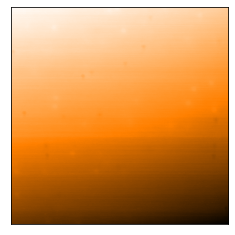

In [15]:
data_file = mtrx_files[0]
traces, _ = mtrx.open(data_file)
image, _ = mtrx.select_image(traces[0])
fig = plt.imshow(image.data , cmap = spiepy.NANOMAP, origin = 'lower')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig('WSe2--6_1-Z.png', 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')

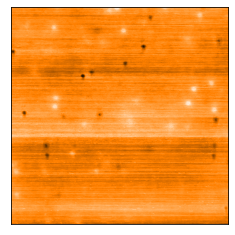

In [8]:
im = spiepy.Im()
im.data = image.data
im_output, _ = spiepy.flatten_xy(im)
image_poly , _ = spiepy.flatten_poly_xy(im_output , deg = 2)
fig = plt.imshow(image_poly.data , cmap = spiepy.NANOMAP, origin = 'lower')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig('WSe2--6_1-Z_plane&duadratic-flattened.png', 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')

In [17]:
im = spiepy.Im()
im.data = image.data
im_output, _ = spiepy.flatten_xy(im)
image_poly , _ = spiepy.flatten_poly_xy(im_output , deg = 2)
image_flattened = line_flatten(image_poly.data)

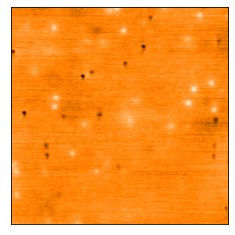

In [18]:
fig = plt.imshow(image_flattened , cmap = spiepy.NANOMAP, origin = 'lower')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig('WSe2--6_1-Z_plane,quadratic,line-flattened.png', 
            bbox_inches='tight', 
            facecolor='white', 
            edgecolor='none')